# Imports

In [1]:
from dqn_agent import DQNAgent
from ppo_agent import PPOAgent
from ffnn_agent import FFNNAgent
from data_processing import preprocess_all_data, load_preprocessed_dataset, get_activity, get_column_units
from data_processing import load_preprocessed_dataset, get_biased_feature_percentage, train_test_split_data, get_xy_from_data, get_activity, get_column_units
from visualize import visualize_results, visualize_training, visualize_preprocessed_data
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
# Load the preprocessed dataset
df = load_preprocessed_dataset()

# Print unique values of Activity ID
unique_activity_ids = df['Activity ID'].unique()
print("Unique Activity IDs:", unique_activity_ids)
print(df.columns)

# Get percentage of biased feature
biased_feature_percentage = get_biased_feature_percentage(df, print_result=False)

# Split into 70% train, 15% val, 15% test with stratification
df_train, df_temp = train_test_split(
    df, test_size=0.30, stratify=df['Sex - Female'], random_state=42
)
df_val, df_test = train_test_split(
    df_temp, test_size=0.50, stratify=df_temp['Sex - Female'], random_state=42
)

# Get X and y data from training, validation, and testing sets
x_train, y_train = get_xy_from_data(df_train)
x_val, y_val = get_xy_from_data(df_val)
x_test, y_test = get_xy_from_data(df_test)

# Make y_train 2d
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print(y_train.shape)
print(x_train.shape)

---- Preprocessed Dataset Info ----
Number of rows: 61000
Number of columns: 39
-----------------------------------
Unique Activity IDs: [ 1  2  3 17 16 13  4  7  6]
Index(['Timestamp', 'Activity ID', 'Heart Rate', 'Hand Sensor - Temperature',
       'Hand Sensor - Accelerometer - X', 'Hand Sensor - Accelerometer - Y',
       'Hand Sensor - Accelerometer - Z', 'Hand Sensor - Gyroscope - X',
       'Hand Sensor - Gyroscope - Y', 'Hand Sensor - Gyroscope - Z',
       'Hand Sensor - Magnetometer - X', 'Hand Sensor - Magnetometer - Y',
       'Hand Sensor - Magnetometer - Z', 'Chest Sensor - Temperature',
       'Chest Sensor - Accelerometer - X', 'Chest Sensor - Accelerometer - Y',
       'Chest Sensor - Accelerometer - Z', 'Chest Sensor - Gyroscope - X',
       'Chest Sensor - Gyroscope - Y', 'Chest Sensor - Gyroscope - Z',
       'Chest Sensor - Magnetometer - X', 'Chest Sensor - Magnetometer - Y',
       'Chest Sensor - Magnetometer - Z', 'Ankle Sensor - Temperature',
       'Ankle Sen

# Initialize system

In [3]:
continuous_columns = [
    'Timestamp', 'Heart Rate', 'Hand Sensor - Temperature',
    'Hand Sensor - Accelerometer - X', 'Hand Sensor - Accelerometer - Y',
    'Hand Sensor - Accelerometer - Z', 'Hand Sensor - Gyroscope - X',
    'Hand Sensor - Gyroscope - Y', 'Hand Sensor - Gyroscope - Z',
    'Hand Sensor - Magnetometer - X', 'Hand Sensor - Magnetometer - Y',
    'Hand Sensor - Magnetometer - Z', 'Chest Sensor - Temperature',
    'Chest Sensor - Accelerometer - X', 'Chest Sensor - Accelerometer - Y',
    'Chest Sensor - Accelerometer - Z', 'Chest Sensor - Gyroscope - X',
    'Chest Sensor - Gyroscope - Y', 'Chest Sensor - Gyroscope - Z',
    'Chest Sensor - Magnetometer - X', 'Chest Sensor - Magnetometer - Y',
    'Chest Sensor - Magnetometer - Z', 'Ankle Sensor - Temperature',
    'Ankle Sensor - Accelerometer - X', 'Ankle Sensor - Accelerometer - Y',
    'Ankle Sensor - Accelerometer - Z', 'Ankle Sensor - Gyroscope - X',
    'Ankle Sensor - Gyroscope - Y', 'Ankle Sensor - Gyroscope - Z',
    'Ankle Sensor - Magnetometer - X', 'Ankle Sensor - Magnetometer - Y',
    'Ankle Sensor - Magnetometer - Z', 'Height', 'Weight',
    'Resting HR', 'Max HR'
]

discrete_columns = [
    'Age', 'Sex - Female'
]

#discrete action size columns
dqn_config = {
    'state_size': 5,  
    'action_size': len(discrete_columns),  
    'hidden_size': 64,
    'lr': 1e-3,
    'gamma': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'epsilon_start': 1.0,
    'epsilon_min': 0.01,
    'epsilon_decay': 0.995
}


#continuous
ppo_config = {
    'state_size': 5,  
    'action_size': len(continuous_columns),   
    'hidden_size': 64,
    'lr': 3e-4,
    'gamma': 0.99,
    'clip_epsilon': 0.2,
    'update_epochs': 4,
    'batch_size': 64,
    'c1': 0.5,
    'c2': 0.01
}
classes = [1, 2, 3, 17, 16, 13, 4, 7, 6]
ffnn_config = {
    'input_size': df.shape[1] - 1,
    'hidden_sizes': [16, 16],
    'output_size': len(classes),
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 100,
    'type': 'classification',
    'classes': classes
}

accuracy_reward_multiplier = 100

synthetic_data_amount = 1000
num_episodes = 100

dqn_agent = DQNAgent(**dqn_config)
ppo_agent = PPOAgent(**ppo_config)
ffnn_agent = FFNNAgent(**ffnn_config)
ffnn_agent_og = FFNNAgent(**ffnn_config)

Using device: cuda
Using device: cuda


# Training

Episode 1/100: Generating Synthetic Data
Episode 1/100: Training FFNN


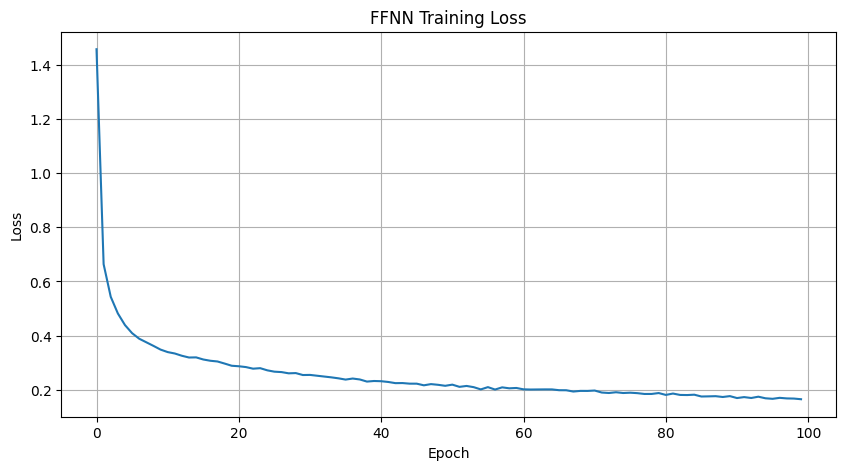

Episode 1/100: Evaluating FFNN
Episode 1/100 | Reward: 111.0575
Training Female Accuracy: 0.9379| Training Accuracy: 0.9575
Validation Female Accuracy: 0.9444| Validation Accuracy: 0.9565
Test accuracy: 0.9566 | Test Female Accuracy: 0.9481
--------------------------------

Episode 2/100: Generating Synthetic Data
Episode 2/100: Training FFNN


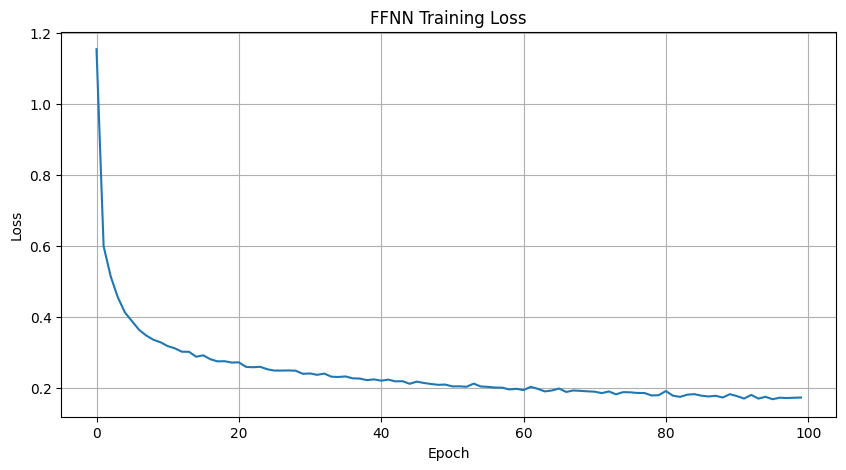

Episode 2/100: Evaluating FFNN
Episode 2/100 | Reward: 112.4515
Training Female Accuracy: 0.9549| Training Accuracy: 0.9606
Validation Female Accuracy: 0.9489| Validation Accuracy: 0.9574
Test accuracy: 0.9540 | Test Female Accuracy: 0.9511
--------------------------------

Episode 3/100: Generating Synthetic Data
Episode 3/100: Training FFNN


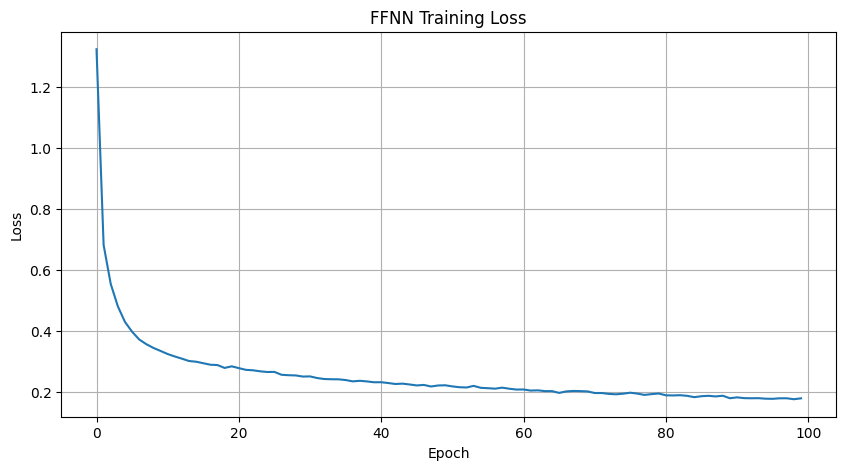

Episode 3/100: Evaluating FFNN
Episode 3/100 | Reward: 112.4338
Training Female Accuracy: 0.9565| Training Accuracy: 0.9665
Validation Female Accuracy: 0.9504| Validation Accuracy: 0.9611
Test accuracy: 0.9598 | Test Female Accuracy: 0.9422
--------------------------------

Episode 4/100: Generating Synthetic Data


KeyboardInterrupt: 

In [4]:
import numpy as np
import pandas as pd
import torch
import json

def evaluate_ffnn(ffnn_agent, data, labels):
    # Ensure data and labels are NumPy arrays
    if isinstance(data, (pd.DataFrame, pd.Series)):
        data = data.to_numpy()
    if isinstance(labels, (pd.Series, pd.DataFrame)):
        labels = labels.to_numpy().reshape(-1)

    # Use the agent's predict function to get predictions
    predicted_classes = ffnn_agent.predict(data)
    
    # Convert labels to numpy array if they're not already
    if isinstance(labels, torch.Tensor):
        labels = labels.cpu().numpy()
    
    # Ensure same shape
    if predicted_classes.shape != labels.shape:
        labels = labels.reshape(-1)
        predicted_classes = predicted_classes.reshape(-1)

    # Compute overall accuracy
    correct = (predicted_classes == labels).sum()
    total = len(labels)
    accuracy = correct / total

    # Compute accuracy for females (last column == 1)
    female_mask = data[:, -1] == 1  # "Sex - Female" is the last column
    
    if female_mask.sum() > 0:
        female_preds = predicted_classes[female_mask]
        female_labels = labels[female_mask]
        female_correct = (female_preds == female_labels).sum()
        female_total = len(female_labels)
        female_accuracy = female_correct / female_total
    else:
        female_accuracy = float('nan')  # No females in the data

    return accuracy, female_accuracy


def plot_ffnn_losses(losses):
    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('FFNN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


def generate_state(df, mf_ratio, n_samples):
    timestamp = np.random.uniform(df['Timestamp'].min(), df['Timestamp'].max())
    male_female_ratio = mf_ratio 
    num_samples = n_samples
    age = np.random.uniform(df['Age'].min(), df['Age'].max())
    activity_id = np.random.choice([1, 2, 3, 17, 16, 13, 4, 7, 6])
    return np.array([timestamp, male_female_ratio, num_samples, age, activity_id])


def compute_mini_reward(synthetic_data, mf_ratio):
    column_std = np.std(synthetic_data, axis=0).mean()
    gaussian_penalty = np.exp(-((mf_ratio - 0.5) ** 2) / 0.1)
    return column_std + gaussian_penalty


def train_agents(x_train, y_train, x_val, y_val, x_test, y_test,
                 dqn_agent, ppo_agent, ffnn_agent, episodes=num_episodes,
                 save_path='training_metrics.json'):

    # Normalize y arrays to shape (n, 1)
    for var in ['y_train', 'y_val', 'y_test']:
        val = locals()[var]
        if isinstance(val, pd.Series):
            locals()[var] = val.to_numpy().reshape(-1, 1)
        elif isinstance(val, pd.DataFrame):
            locals()[var] = val.to_numpy()

    rewards = []
    val_accuracies = []
    test_accuracies = []
    train_accuracies = []
    val_female_accuracies = []
    test_female_accuracies = []
    train_female_accuracies = []

    synthetic_data = []
    synthetic_labels = []

    # Initial male-female ratio
    sex_female_idx = x_train.columns.get_loc('Sex - Female')
    mf_ratio = np.mean(x_train.iloc[:, sex_female_idx])
    state = generate_state(x_train, mf_ratio, 0)

    for episode in range(episodes):
        print(f"Episode {episode + 1}/{episodes}: Generating Synthetic Data")
        for i in range(synthetic_data_amount):
            if synthetic_data:
                synthetic_array = np.array(synthetic_data)
                if synthetic_array.ndim == 1:
                    synthetic_array = synthetic_array.reshape(1, -1)
                combined_array = np.vstack([x_train.to_numpy(), synthetic_array])
                combined = pd.DataFrame(combined_array, columns=x_train.columns)
            else:
                combined = x_train.copy()

            sex_female_idx = combined.columns.get_loc('Sex - Female')
            mf_ratio = np.mean(combined.iloc[:, sex_female_idx])

            discrete_action = np.array(dqn_agent.predict(state), ndmin=1)
            continuous_action = np.array(ppo_agent.predict(state), ndmin=1)

            synthetic_row = np.zeros(x_train.shape[1])
            discrete_indices = x_train.columns.get_indexer(discrete_columns)
            continuous_indices = x_train.columns.get_indexer(continuous_columns)
            synthetic_row[discrete_indices] = discrete_action
            synthetic_row[continuous_indices] = continuous_action

            synthetic_data.append(synthetic_row)
            synthetic_labels.append(state[4])  # activity ID

            mini_reward = compute_mini_reward(np.array(synthetic_data), mf_ratio)
            done = i == synthetic_data_amount - 1

            if done:
                print(f"Episode {episode + 1}/{episodes}: Training FFNN")
                
                ffnn_agent.reset()

                synthetic_data_np = np.array(synthetic_data)
                synthetic_labels_np = np.array(synthetic_labels).reshape(-1, 1)

                combined_data = np.vstack([x_train.to_numpy(), synthetic_data_np])
                combined_labels = np.vstack([y_train, synthetic_labels_np])

                # Shuffle combined training data
                indices = np.arange(combined_data.shape[0])
                np.random.shuffle(indices)
                combined_data = combined_data[indices]
                combined_labels = combined_labels[indices]

                # Train FFNN
                losses = ffnn_agent.train(combined_data, combined_labels)
                plot_ffnn_losses(losses)

                print(f"Episode {episode + 1}/{episodes}: Evaluating FFNN")

                train_accuracy, train_female_accuracy = evaluate_ffnn(ffnn_agent, x_train, y_train)
                val_accuracy, val_female_accuracy = evaluate_ffnn(ffnn_agent, x_val, y_val)
                test_accuracy, test_female_accuracy = evaluate_ffnn(ffnn_agent, x_test, y_test)

                reward = val_accuracy * accuracy_reward_multiplier
                reward += mini_reward
                train_accuracies.append(train_accuracy)
                val_accuracies.append(val_accuracy)
                test_accuracies.append(test_accuracy)
                train_female_accuracies.append(train_female_accuracy)
                val_female_accuracies.append(val_female_accuracy)
                test_female_accuracies.append(test_female_accuracy)

                print(f"Episode {episode + 1}/{episodes} | Reward: {reward:.4f}\nTraining Female Accuracy: {train_female_accuracy:.4f}| Training Accuracy: {train_accuracy:.4f}\nValidation Female Accuracy: {val_female_accuracy:.4f}| Validation Accuracy: {val_accuracy:.4f}\nTest accuracy: {test_accuracy:.4f} | Test Female Accuracy: {test_female_accuracy:.4f}\n\n--------------------------------\n")

                synthetic_data = []
                synthetic_labels = []
            else:
                reward = mini_reward

            next_state = generate_state(x_train, mf_ratio, len(synthetic_data) + 1)
            dqn_agent.learn(state, discrete_action, reward, next_state, done)
            ppo_agent.learn(state, continuous_action, reward, next_state, done)

            rewards.append(reward)
            state = next_state

    metrics = {
        'rewards': rewards,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracies': test_accuracies,
        'train_female_accuracies': train_female_accuracies,
        'val_female_accuracies': val_female_accuracies,
        'test_female_accuracies': test_female_accuracies
    }

    with open(save_path, 'w') as f:
        json.dump(metrics, f)
    print(f"Metrics saved to {save_path}")

    return metrics

# Example usage
results = train_agents(x_train, y_train, x_val, y_val, x_test, y_test, dqn_agent, ppo_agent, ffnn_agent)
dqn_agent.save("dqn_trained_model.pth")
ppo_agent.save("ppo_trained_model.pth")


# Testing


In [ ]:

accuracy = evaluate_ffnn(ffnn_agent, x_test, y_test)
print(f"Test Results | Accuracy: {accuracy:.4f}")


ffnn_agent_og.train(x_train.to_numpy(), y_train)
og_accuracy = evaluate_ffnn(ffnn_agent_og, x_test, y_test)
print(f"No Synthetic Data Test Accuracy: {og_accuracy}")


# Visualize results

In [6]:
# visualize_training([], [])
# visualize_results(dqn_agent, ppo_agent, df)
# visualize_preprocessed_data(df)